In [11]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe = dataframe.i
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
#print(test_X)
#print(test_y)
#print(series)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
#print(test_y)
#print(predictions)
print(residuals.head())

      0
0 -10.0
1   3.0
2  -6.0
3  30.0
4 -28.0


In [15]:
dataframe = dataframe.drop(365)
print(dataframe) #index = 365 means next year's 1st day

      t-1  t+1
0     NaN   35
1    35.0   32
2    32.0   30
3    30.0   31
4    31.0   44
5    44.0   29
6    29.0   45
7    45.0   43
8    43.0   38
9    38.0   27
10   27.0   38
11   38.0   33
12   33.0   55
13   55.0   47
14   47.0   45
15   45.0   37
16   37.0   50
17   50.0   43
18   43.0   41
19   41.0   52
20   52.0   34
21   34.0   53
22   53.0   39
23   39.0   32
24   32.0   37
25   37.0   43
26   43.0   39
27   39.0   35
28   35.0   44
29   44.0   38
..    ...  ...
335  45.0   32
336  32.0   46
337  46.0   41
338  41.0   34
339  34.0   33
340  33.0   36
341  36.0   49
342  49.0   43
343  43.0   43
344  43.0   34
345  34.0   39
346  39.0   35
347  35.0   52
348  52.0   47
349  47.0   52
350  52.0   39
351  39.0   40
352  40.0   42
353  42.0   42
354  42.0   53
355  53.0   39
356  39.0   40
357  40.0   38
358  38.0   44
359  44.0   34
360  34.0   37
361  37.0   52
362  52.0   48
363  48.0   55
364  55.0   50

[365 rows x 2 columns]


In [54]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
#print(dataframe)
#print(train_resid)
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))

Lag=15, Coef=[ 0.13397979 -0.84974854 -0.77964169 -0.7300768  -0.68147961 -0.58396715
 -0.53180179 -0.42095091 -0.24063388 -0.18887492 -0.15229041 -0.10182397
 -0.13941567 -0.12967715 -0.11980674 -0.03258797]


In [16]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe = dataframe.drop(365)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
#print(train_y)
#print(train_pred)

In [17]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
print(history)

[2.0, 5.0, 1.0, -12.0, 11.0, -6.0, 8.0, 0.0, -6.0, -1.0, 5.0, 4.0, 2.0, -9.0, 1.0]


predicted error=1.155523, expected error=9.000000
predicted error=-7.108809, expected error=-10.000000
predicted error=3.007486, expected error=3.000000
predicted error=-0.756446, expected error=-6.000000
predicted error=5.511163, expected error=30.000000
predicted error=-19.991264, expected error=-28.000000
predicted error=4.842429, expected error=2.000000
predicted error=3.050883, expected error=9.000000
predicted error=-5.141585, expected error=-7.000000
predicted error=1.161119, expected error=1.000000
predicted error=-0.241928, expected error=-9.000000
predicted error=9.159826, expected error=21.000000
predicted error=-7.117974, expected error=-13.000000
predicted error=1.182992, expected error=-2.000000
predicted error=2.769363, expected error=11.000000
predicted error=-4.959337, expected error=-11.000000
predicted error=2.566233, expected error=-8.000000
predicted error=9.084498, expected error=6.000000
predicted error=3.020899, expected error=16.000000
predicted error=-6.542098

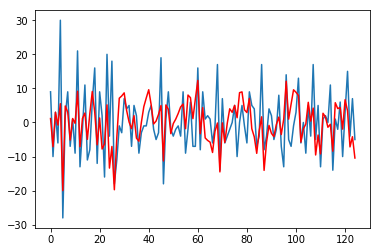

In [18]:
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    #print lag
    #print 'printed for this iteration'
    pred_error = coef[0]
    #print pred_error
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1] #multiply starting latest residual error with first coeff and continue likewise
    predictions.append(pred_error)
    history.append(error) #add expected error calculated from test set, as this will be used later to calculate pred error since we started at the end of training set so the next values will be from test set
    print('predicted error=%f, expected error=%f' % (pred_error, error))
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=43.155523, expected=51.000000
predicted=43.891191, expected=41.000000
predicted=44.007486, expected=44.000000
predicted=43.243554, expected=38.000000
predicted=43.511163, expected=68.000000
predicted=48.008736, expected=40.000000
predicted=44.842429, expected=42.000000
predicted=45.050883, expected=51.000000
predicted=45.858415, expected=44.000000
predicted=45.161119, expected=45.000000
predicted=44.758072, expected=36.000000
predicted=45.159826, expected=57.000000
predicted=49.882026, expected=44.000000
predicted=45.182992, expected=42.000000
predicted=44.769363, expected=53.000000
predicted=48.040663, expected=42.000000
predicted=44.566233, expected=34.000000
predicted=43.084498, expected=40.000000
predicted=43.020899, expected=56.000000
predicted=49.457902, expected=44.000000
predicted=45.328116, expected=53.000000
predicted=45.225588, expected=55.000000
predicted=48.705924, expected=39.000000
predicted=44.166344, expected=59.000000
predicted=45.621871, expected=55.000000


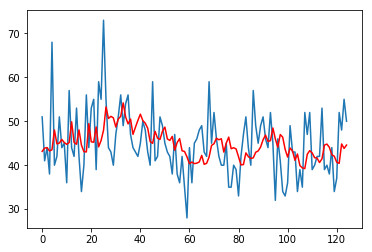

In [20]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe = dataframe.drop(365)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
 
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
mse = mean_squared_error(test_y, predictions)
print('After correction: Test MSE: %.3f' % mse)
mse = mean_squared_error(test_y, test_X)
print('Before correction: Test MSE: %.3f' % mse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()